<a href="https://colab.research.google.com/github/purnaa-l/NLP-Projects/blob/main/classification/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
data = pd.read_csv("train.csv", encoding='latin1')


In [8]:
data = data[['text', 'sentiment']]

sentiment_mapping = {
    'positive': 1,
    'negative': -1,
    'neutral': 0
}
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

print(data.head())

                                                text  sentiment
0                I`d have responded, if I were going          0
1      Sooo SAD I will miss you here in San Diego!!!         -1
2                          my boss is bullying me...         -1
3                     what interview! leave me alone         -1
4   Sons of ****, why couldn`t they put them on t...         -1


In [9]:
data.shape

(27481, 2)

<Axes: xlabel='sentiment'>

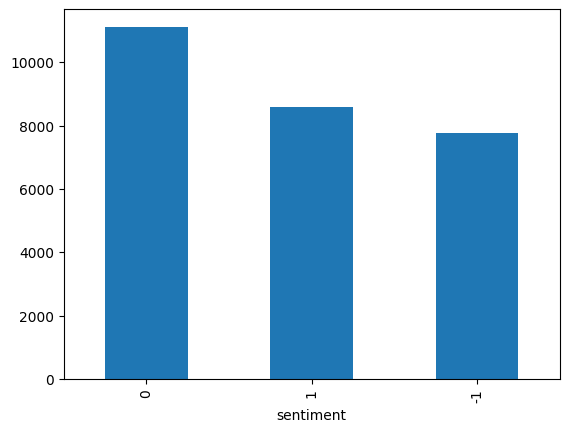

In [10]:
data['sentiment'].value_counts()
data['sentiment'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

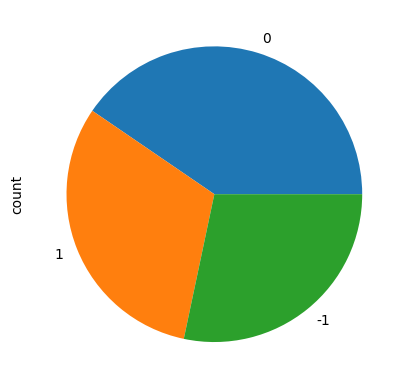

In [11]:
data['sentiment'].value_counts().plot(kind='pie')


In [12]:
data['text'][999]

' I`ve been unlocked for decades now...just not lucky, never have been.  Gottta make my own luck and that involves $$$$$'

In [13]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import re
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english'))

def preprocessing(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords_set)

    return text

# Example
sample_text = "<p>This is an example tweet! Check out http://example.com</p>"
print(preprocessing(sample_text))


example tweet check


In [15]:
data['text'] = data['text'].apply(lambda x: preprocessing(x) if isinstance(x, str) else '')


In [16]:
data['text']

,text
0,id responded going
1,sooo sad miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought
...,...
27476,wish could come see u denver husband lost job ...
27477,ive wondered rake client made clear net dont f...
27478,yay good enjoy break probably need hectic week...
27479,worth


In [17]:
positive=data[data['sentiment']==1]
positive=positive['text']
negative=data[data['sentiment']==-1]
negative=negative['text']
neutral=data[data['sentiment']==0]
neutral=neutral['text']
from collections import Counter

pwords=' '.join(positive).split()
pcount=Counter(pwords)
pwords_common=pcount.most_common(10)
print(pwords_common)


[('day', 1234), ('good', 1046), ('love', 875), ('happy', 840), ('im', 746), ('mothers', 629), ('thanks', 553), ('great', 478), ('like', 413), ('hope', 396)]


In [18]:
nwords=' '.join(negative).split()
ncount=Counter(nwords)
nwords_common=ncount.most_common(10)
print(nwords_common)


[('im', 1234), ('like', 476), ('dont', 469), ('cant', 466), ('get', 436), ('miss', 422), ('go', 401), ('sad', 389), ('work', 386), ('sorry', 340)]


In [19]:
nnwords=' '.join(neutral).split()
nncount=Counter(nnwords)
nnwords_common=nncount.most_common(10)
print(nnwords_common)


[('im', 1072), ('get', 624), ('go', 576), ('day', 522), ('dont', 493), ('going', 479), ('work', 477), ('like', 457), ('lol', 455), ('got', 454)]


In [20]:
from sklearn.model_selection import train_test_split

X = data['text']        # Features (cleaned text)
y = data['sentiment']   # Labels (encoded sentiment)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Assume data is already preprocessed with 'text' and 'sentiment'
X = data['text']
y = data['sentiment']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}

# Train each model and print accuracy & classification report
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.6894669819901764
              precision    recall  f1-score   support

          -1       0.73      0.60      0.66      1556
           0       0.62      0.76      0.68      2224
           1       0.78      0.68      0.73      1717

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497



--- Random Forest ---
Accuracy: 0.7000181917409496
              precision    recall  f1-score   support

          -1       0.73      0.61      0.66      1556
           0       0.65      0.73      0.69      2224
           1       0.75      0.74      0.75      1717

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.70      0.70      0.70      5497



--- Gradient Boosting ---
Accuracy: 0.6481717300345643
              precision    recall  f1-score   support

          -1    

Why vectorisation?


Machines don’t understand text as we do. They only understand numbers. So we need to convert text into numerical representations that models can work with. This process is called
vectorization.

1️⃣ How TF-IDF is calculated/detected

TF-IDF stands for Term Frequency – Inverse Document Frequency. It measures how important a word is in a document relative to the whole corpus.

It has two parts:

a) Term Frequency (TF)

How often a word appears in a document:

𝑇
𝐹
(
𝑤
𝑜
𝑟
𝑑
)
=
Number of times the word appears in document
Total words in the document
TF(word)=
Total words in the document
Number of times the word appears in document
	​


Example:
Document: "I love love this movie"

Total words = 4

TF("love") = 2 / 4 = 0.5

TF("movie") = 1 / 4 = 0.25

b) Inverse Document Frequency (IDF)

How unique the word is across all documents:

𝐼
𝐷
𝐹
(
𝑤
𝑜
𝑟
𝑑
)
=
log
⁡
Total number of documents
1
+
Number of documents containing the word
IDF(word)=log
1+Number of documents containing the word
Total number of documents
	​


Common words like “the”, “is” → Low IDF

Rare words like “amazing”, “terrible” → High IDF

c) TF-IDF

Multiply the two together:

𝑇
𝐹
-
𝐼
𝐷
𝐹
(
𝑤
𝑜
𝑟
𝑑
)
=
𝑇
𝐹
(
𝑤
𝑜
𝑟
𝑑
)
×
𝐼
𝐷
𝐹
(
𝑤
𝑜
𝑟
𝑑
)
TF-IDF(word)=TF(word)×IDF(word)

High TF-IDF → Important in this document, not common elsewhere

Low TF-IDF → Common or not important

This is how vectorizers detect important features from text automatically.

Step 1: Collect Data

Gather text data along with labels.

Example: Tweets with sentiment labels (positive, negative, neutral).

Step 2: Clean/Preprocess Text

Remove unnecessary stuff like HTML tags, URLs, punctuation, numbers.

Lowercase all words.

Remove stopwords like “the”, “is”, “and” (optional).

Sometimes do stemming or lemmatization (reduce words to their root).

Goal: Make text consistent and easier to analyze.

Step 3: Convert Text to Numbers (Vectorization)

Machines cannot understand words directly.

Convert text into numbers using methods like:

Bag of Words (counts of words)

TF-IDF (importance of words)

Word embeddings (dense numeric vectors representing meaning)

Goal: Represent each text as a numeric vector that a model can process.

Step 4: Split Data

Divide your data into:

Training set → Used to teach the model.

Test set → Used to check how well the model learned.

Step 5: Train a Model

Feed the training vectors and labels into a machine learning model.

Common models: Logistic Regression, Random Forest, SVM, Naive Bayes.

Goal: The model learns patterns between text features and labels.

Step 6: Make Predictions

Use the trained model to predict labels for the test set.

Step 7: Evaluate the Model

Compare predictions with true labels.

Use metrics like:

Accuracy → Fraction of correct predictions

Precision, Recall, F1-score → How well each class is predicted

Step 8: Improve the Model (Optional)

Try different models or hyperparameters.

Use better text representations (like embeddings or BERT).

Remove or add features.